In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<ipython-input-112-d0e3aef5e916>:3: RuntimeWarning: overflow encountered in square
  C = 3 * R * (((theta_E/T)**2 * np.exp(theta_E/T)) / ((np.exp(theta_E/T)-1)**2))
<ipython-input-112-d0e3aef5e916>:3: RuntimeWarning: overflow encountered in exp
  C = 3 * R * (((theta_E/T)**2 * np.exp(theta_E/T)) / ((np.exp(theta_E/T)-1)**2))
<ipython-input-112-d0e3aef5e916>:3: RuntimeWarning: invalid value encountered in true_divide
  C = 3 * R * (((theta_E/T)**2 * np.exp(theta_E/T)) / ((np.exp(theta_E/T)-1)**2))


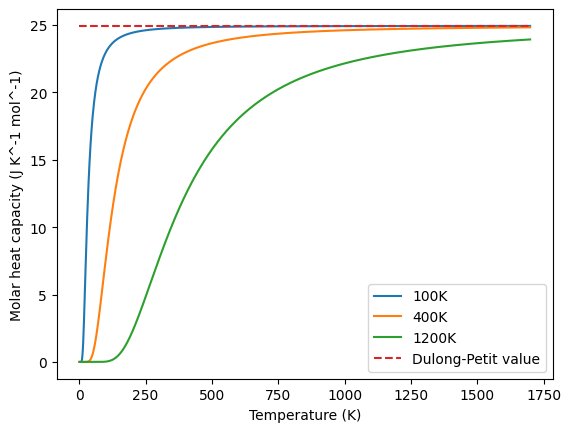

In [112]:
def Einstein(T, R, theta_E):
  #defining the Einstein function and its constants
  C = 3 * R * (((theta_E/T)**2 * np.exp(theta_E/T)) / ((np.exp(theta_E/T)-1)**2))
  return C


#defining gas constant value
R = 8.314472

#setting up a time variable 
T = np.arange(1, 1700)

Einstein_100 = Einstein(T, R, 100)
Einstein_400 = Einstein(T, R, 400)
Einstein_1200 = Einstein(T, R, 1200)

plt.plot(T, Einstein_100, label='100K')
plt.plot(T, Einstein_400, label='400K')
plt.plot(T, Einstein_1200, label='1200K')
x = np.linspace(1, 1700)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.legend()

#Dulong-Petit limit is 3R = 24.9

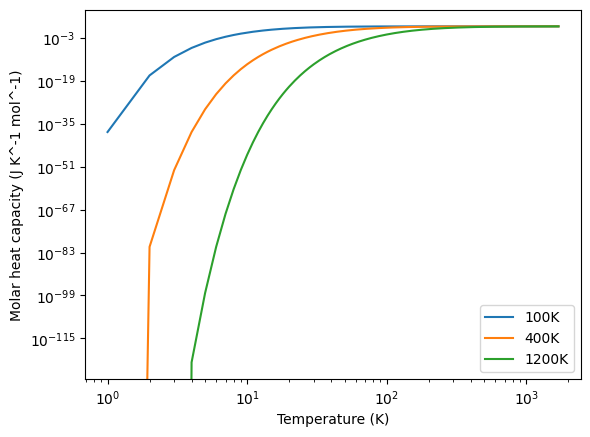

In [113]:
plt.loglog(T, Einstein_100, label='100K')
plt.loglog(T, Einstein_400, label='400K')
plt.loglog(T, Einstein_1200, label='1200K')
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.legend()


#need to explain that model does not reproduce expected T^3 !!!!

In [119]:
#T in column 1, C in column 2
T_t, C_t = np.loadtxt('tin.txt', unpack=True)
T_d, C_d = np.loadtxt('diamond.txt', unpack=True)
T_l, C_l = np.loadtxt('lead.txt', unpack=True)
T_s, C_s = np.loadtxt('silicon.txt', unpack=True)
T_g, C_g = np.loadtxt('germanium.txt', unpack=True)

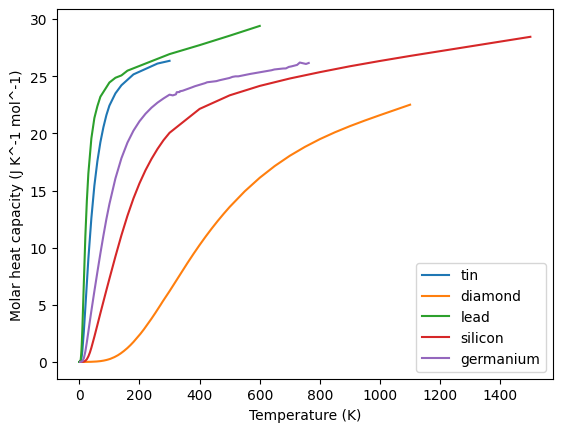

In [123]:
plt.plot(T_t, C_t, label='tin')
plt.plot(T_d, C_d, label='diamond')
plt.plot(T_l, C_l, label='lead')
plt.plot(T_s, C_s, label='silicon')
plt.plot(T_g, C_g, label='germanium')
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.legend()


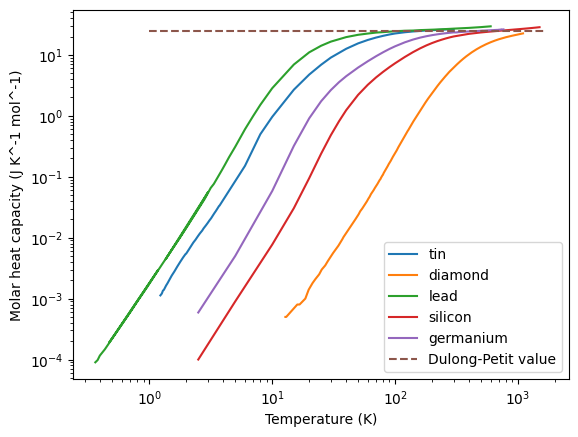

In [180]:
plt.loglog(T_t, C_t, label='tin')
plt.loglog(T_d, C_d, label='diamond')
plt.loglog(T_l, C_l, label='lead')
plt.loglog(T_s, C_s, label='silicon')
plt.loglog(T_g, C_g, label='germanium')
x = np.linspace(1, 1700)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.legend()

In [125]:
import sympy as sy

In [129]:
def debye(theta_D, T, R):
  def f(theta_D, T):
    x = theta_D/T
    return x**4 * np.exp(x) / ((np.exp(x)-1)**2)
  return 9 * R * (T/theta_D)**3 * sy.integrate(f(theta_D, T), (x, 0, 2))

R = 8.314472

debye_tin = debye(theta_D, R, T=T_t)

plt.plot(dybye)

NameError: ignored

8.57097204994235
0.07114351803934064
116.90654369648851
2.4191464386177204


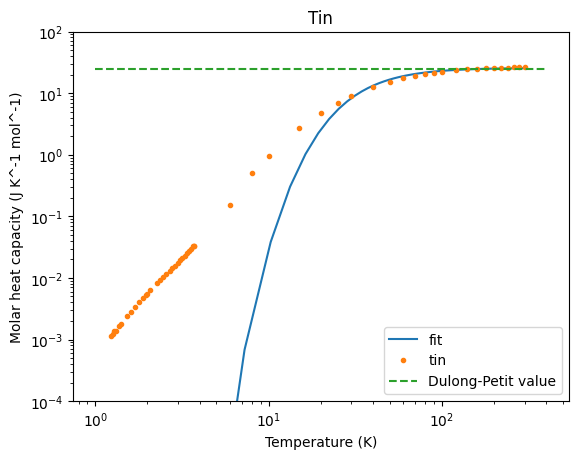

In [185]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_t), max(T_t), num=100)
p_guess = np.array([10, 150])
y_guess = Einstein(T_t, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_t, C_t, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='fit')
plt.loglog(T_t, C_t, 'o', markersize=3, label='tin')
x = np.linspace(1, 400)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Tin')
plt.legend()

8.778268451141368
0.05990716082042034
69.98142480508865
1.5459733988355573


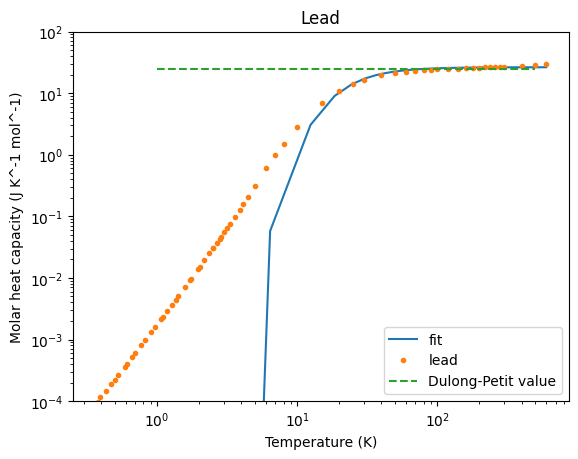

In [187]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_l), max(T_l), num=100)
p_guess = np.array([10, 100])
y_guess = Einstein(T_l, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_l, C_l, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='fit')
plt.loglog(T_l, C_l, 'o', markersize=3, label='lead')
x = np.linspace(1, 500)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Lead')
plt.legend()

8.733757448850891
0.14215472451877867
467.75660211509785
15.695707373766911


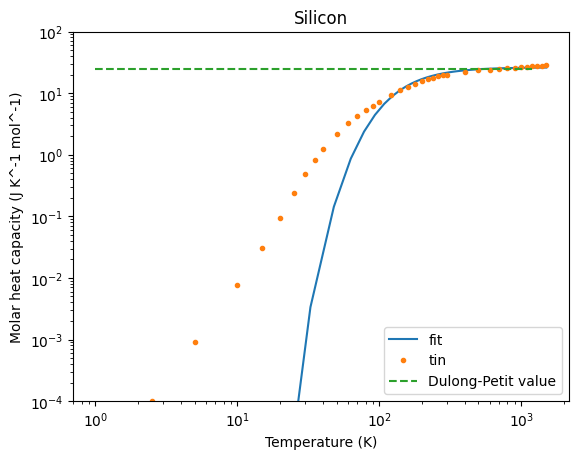

In [191]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_s), max(T_s), num=100)
p_guess = np.array([10, 500])
y_guess = Einstein(T_s, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_s, C_s, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='fit')
plt.loglog(T_s, C_s, 'o', markersize=3, label='tin')
x = np.linspace(1, 1200)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Silicon')
plt.legend()

7.901416733785473
0.06060730337196976
1256.9244691435133
9.075550185399404


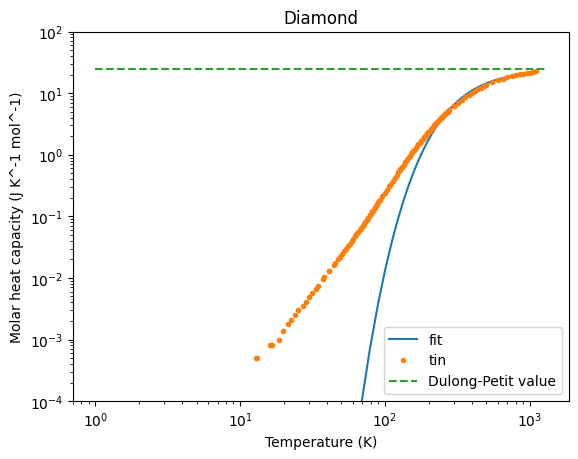

In [193]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_d), max(T_d), num=100)
p_guess = np.array([10, 1500])
y_guess = Einstein(T_d, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_d, C_d, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='fit')
plt.loglog(T_d, C_d, 'o', markersize=3, label='tin')
x = np.linspace(1, 1300)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Diamond')
plt.legend()

8.421892636716645
0.0642292880489045
258.77809991722705
6.42872423657392


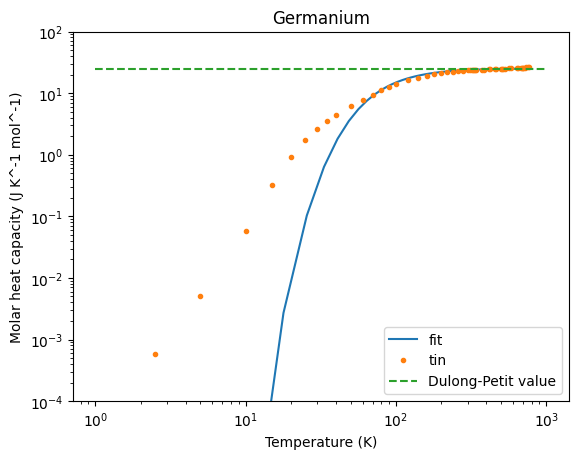

In [195]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_g), max(T_g), num=100)
p_guess = np.array([10, 150])
y_guess = Einstein(T_g, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_g, C_g, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='fit')
plt.loglog(T_g, C_g, 'o', markersize=3, label='tin')
x = np.linspace(1, 1000)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Germanium')
plt.legend()